In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



In [3]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [5]:
len(X_train[0][0])

28

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
y_train.shape

(60000,)

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

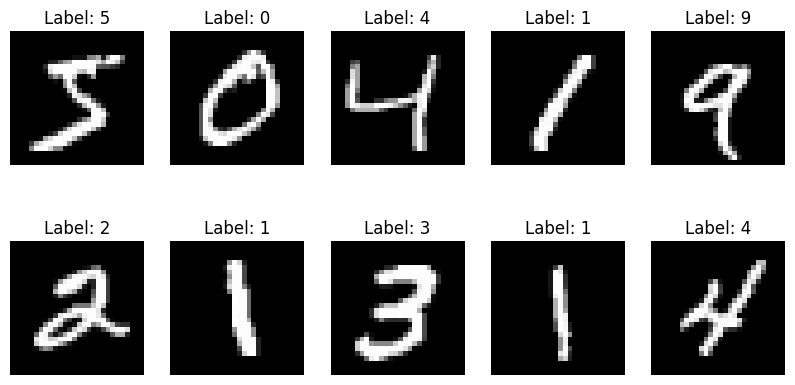

In [9]:

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')

plt.show()


<ipython-input-10-10c86b745f11>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")


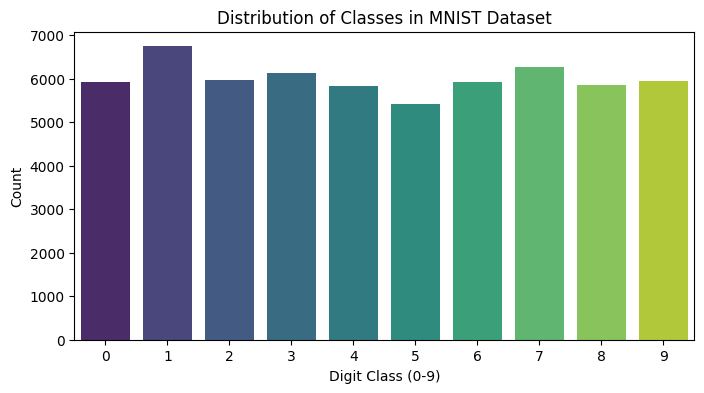

In [10]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="viridis")
plt.title("Distribution of Classes in MNIST Dataset")
plt.xlabel("Digit Class (0-9)")
plt.ylabel("Count")
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9083 - loss: 0.2995 - val_accuracy: 0.9829 - val_loss: 0.0531
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9855 - loss: 0.0427 - val_accuracy: 0.9862 - val_loss: 0.0397
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9914 - loss: 0.0276 - val_accuracy: 0.9905 - val_loss: 0.0274
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9937 - loss: 0.0194 - val_accuracy: 0.9913 - val_loss: 0.0263
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 0.9912 - val_loss: 0.0275
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 28ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9927 - val_loss: 0.0269
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9974 - loss: 0.0082 - val_accuracy: 0.9910 - val_loss: 0.0365
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9972 -

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 2s - 7ms/step - accuracy: 0.9906 - loss: 0.0416

Test accuracy: 0.9906


Visualizing Training Performance

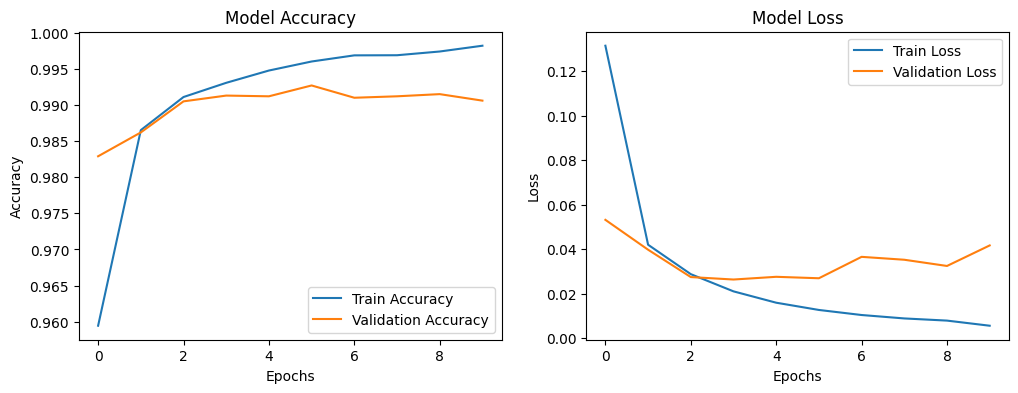

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


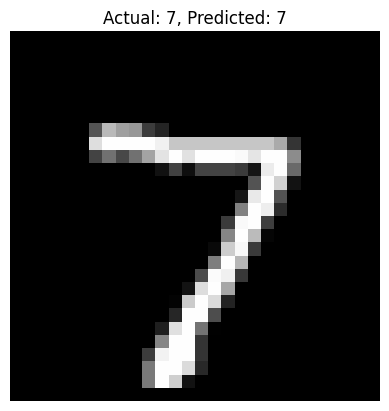

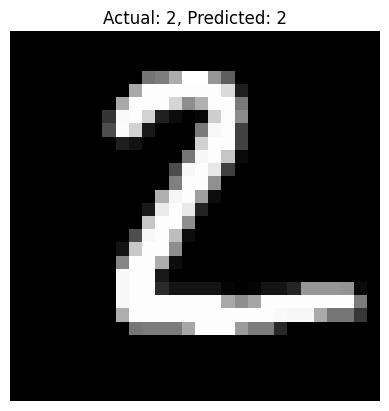

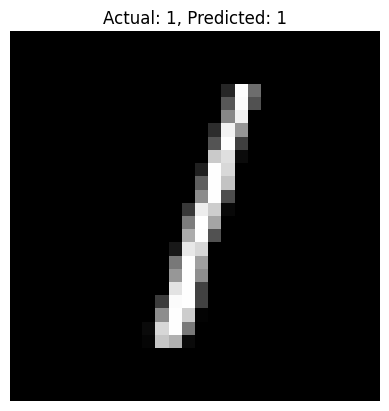

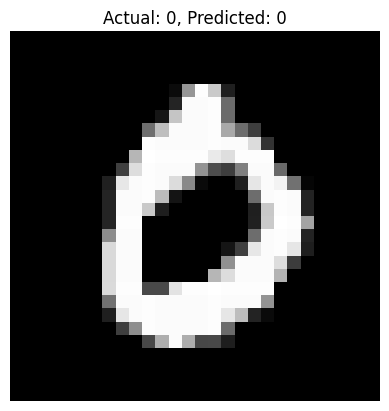

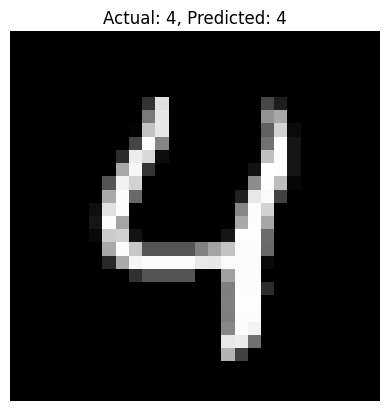

In [15]:
predictions = model.predict(X_test)

def plot_sample_predictions(index):
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test[index]}, Predicted: {np.argmax(predictions[index])}")
    plt.axis('off')
    plt.show()

for i in range(5):
    plot_sample_predictions(i)


In [16]:
model.save("mnist_digit_recognizer.h5")

In [5]:
model = keras.models.load_model("mnist_digit_recognizer.h5")

In [18]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("/content/scanned (1).png", cv2.IMREAD_GRAYSCALE)

# Ensure the digit is on a square canvas
h, w = img.shape
size = max(h, w)
square = np.ones((size, size), np.uint8) * 255  # White background
x_offset = (size - w) // 2
y_offset = (size - h) // 2
square[y_offset:y_offset + h, x_offset:x_offset + w] = img

# Resize to 28x28
img = cv2.resize(square, (28, 28))

# Invert colors (if needed)
img = cv2.bitwise_not(img)

# Normalize pixel values
img = img.astype('float32') / 255.0

# Reshape for CNN
img = img.reshape(1, 28, 28, 1)

# Predict the digit
prediction = model.predict(img)
digit = np.argmax(prediction)

print(f"Predicted Digit: {digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Digit: 2
